In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from PIL import Image
from matplotlib import pyplot
import cv2

In order to convert an imag to gray scale we must make a weigted average of the pixel channel values.  
Common weighted average used:  

1.  Y = 0.299R  + 0.587G  + 0.114B  
2.  Y = 0.2126R + 0.7152G + 0.0722B  
3.  Y = 0.2627R + 0.6780G + 0.0593B    



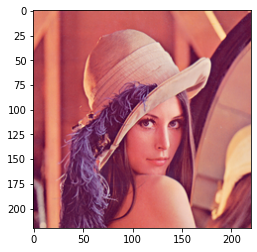

In [23]:
image = Image.open('../assets/Lena.png')
image_numpy = np.asarray(image)
pyplot.imshow(image_numpy)
pyplot.show()

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

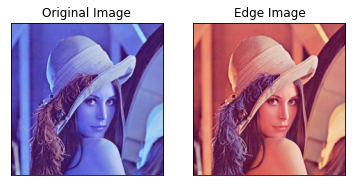

In [24]:
im = cv2.imread('../assets/Lena.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)   # BGR -> RGB
pyplot.imshow(im)
plt.subplot(121),plt.imshow(im,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Gray Image'), ([], []), ([], []))

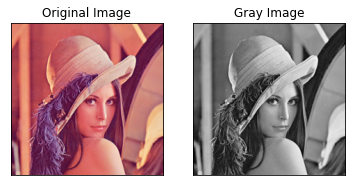

In [25]:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray,cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Gray Image'), ([], []), ([], []))

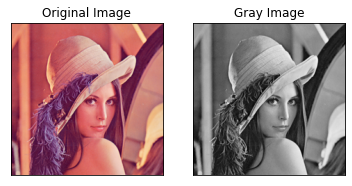

In [26]:
num_rows = image_numpy.shape[0]
num_cols = image_numpy.shape[1]
gray2 = np.zeros((num_rows, num_cols), dtype = np.uint8)
for i in range(num_rows):
    for j in range(num_cols):
        gray2[i, j] = np.trunc(0.2627*image_numpy[i, j, 0] + 0.7152*image_numpy[i, j, 1] + 0.0722*image_numpy[i, j, 2])
        gray2[i, j] = 255 if gray2[i, j] > 255 else gray2[i, j]
        
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray2,cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])

# Channels and histograms  
## Histogram  
[From Wikipedia, the free encyclopedia](http://google.com)
For the histogram used in digital image processing, see Image histogram and Color histogram.  

First described by	Karl Pearson
Purpose	To roughly assess the probability distribution of a given variable by depicting the frequencies of observations occurring in certain ranges of values.  

A histogram is an approximate representation of the distribution of numerical data. It was first introduced by Karl Pearson. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size.  

If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.  

However, bins need not be of equal width; in that case, the erected rectangle is defined to have its area proportional to the frequency of cases in the bin. The vertical axis is then not the frequency but frequency density—the number of cases per unit of the variable on the horizontal axis. Examples of variable bin width are displayed on Census bureau data below.  

As the adjacent bins leave no gaps, the rectangles of a histogram touch each other to indicate that the original variable is continuous.  

Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable. The total area of a histogram used for probability density is always normalized to 1. If the length of the intervals on the x-axis are all 1, then a histogram is identical to a relative frequency plot.  

(Text(0.5, 1.0, 'Gray channel'), ([], []), ([], []))

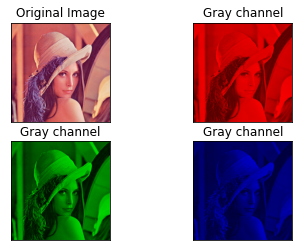

In [27]:
red_img = img.copy()
red_img[:,:,1] = red_img[:,:,1]*0
red_img[:,:,2] = red_img[:,:,2]*0

green_img = img.copy()
green_img[:,:,0] = green_img[:,:,0]*0
green_img[:,:,2] = green_img[:,:,2]*0

blue_img = img.copy()
blue_img[:,:,0] = blue_img[:,:,0]*0
blue_img[:,:,1] = blue_img[:,:,1]*0

plt.subplot(221),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(red_img,cmap = 'gray')
plt.title('Gray channel'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(green_img,cmap = 'gray')
plt.title('Gray channel'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(blue_img,cmap = 'gray')
plt.title('Gray channel'), plt.xticks([]), plt.yticks([])


## Function that calculate the columns of the histogram

In [28]:
def calcHistogram(mat):
    result = np.zeros(256, dtype=int)
    num_rows = mat.shape[0]
    num_cols = mat.shape[1]
    for i in range(num_rows):
        for j in range(num_cols):
            result[mat[i, j]] = result[mat[i, j]] + 1 
    return result

## Histogram of the red channel

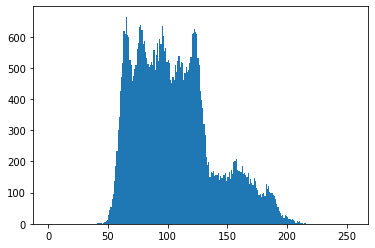

In [29]:
red_channel = img[:,:,2]
hist1 = calcHistogram(red_channel)
bins = np.array(list(range(256)))*1.0
counts = np.array(hist1)

g = plt.hist(bins, bins, weights=counts)

# Channels

In [30]:
im1 = cv2.imread('../assets/at-the-beach-hd-wallpaper.jpeg')
im2 = cv2.imread('../assets/luna-paisajes-wallpapers-hd.jpg')
img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)   # BGR -> RGB
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)   # BGR -> RGB

dim1 = min(img1.shape[0], img2.shape[0])
dim2 = min(img1.shape[1], img2.shape[1])

img1 = img1[0:dim1, 0:dim2, :]
img2 = img2[0:dim1, 0:dim2, :]
h = 600
w = 800
dsize = (w, h)
img1 = cv2.resize(img1, dsize)
img2 = cv2.resize(img2, dsize)

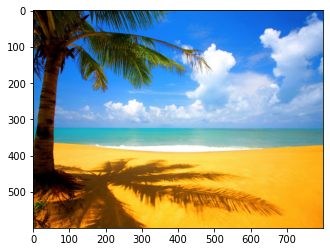

In [31]:
pyplot.imshow(img1)

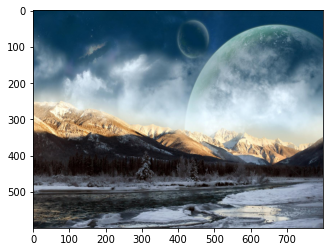

In [32]:

pyplot.imshow(img2)

## Merge images
Each image is modified with a complementary filter using sigmoide function

In [45]:
rel = 50.0
arr1 = [[ [   int(img1[row, col, c] * 1.0 / (1+np.exp(-((col - w/2)/rel) )) )  for c in range(3)] for col in range(w)] for row in range(h)]
arr2 = [[ [   int(img2[row, col, c] * (1.0 - 1.0 / (1+np.exp(-((col - w/2)/rel)) )) )  for c in range(3)] for col in range(w)] for row in range(h)]

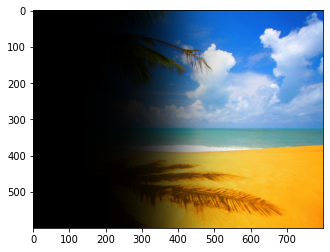

In [46]:
pyplot.imshow(np.array(arr1) )

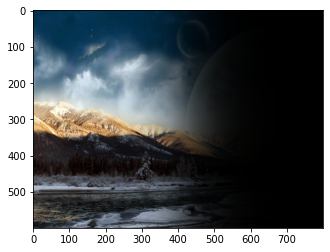

In [47]:
pyplot.imshow(np.array(arr2))

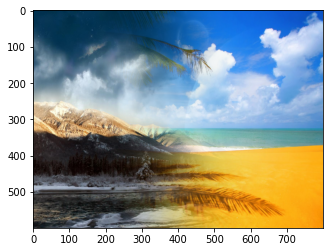

In [44]:
pyplot.imshow(np.array(arr1) + np.array(arr2))